# **Agglomerative Hierarchical Clustering Classification**

## **1. Importing Libararies**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

## **2. Reading Data and Header View**

In [58]:
df = pd.read_csv('customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


## **3. Shape of Data**

In [59]:
df.shape

(1500, 9)

## **4. Info about Data**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


## **5. Null Values Distribution**

In [61]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

## **6. Description of Data**

In [62]:
df.describe(include='all')

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


## **7. Data Types of Features**

In [63]:
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

## **8. Train Test Split**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['PurchaseStatus']),
                                                    df['PurchaseStatus'], test_size=0.2, random_state=42)

## **9. Columns Indices**

In [65]:
numerical_columns = [0, 1, 2, 3, 4, 5, 6, 7]

## **10. Creating Pipeline**

In [66]:
handle_numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

## **11. Combining Pipeline in ColumnTransformer**

In [67]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns)
], remainder='passthrough')

## **12. Plotting Dendogram**

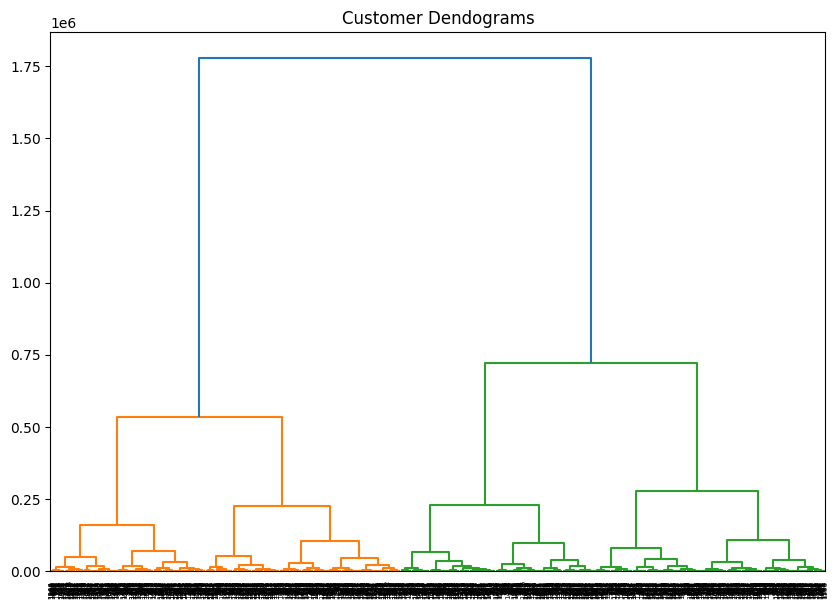

In [68]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

## **13. Fitting Clusters**

In [69]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_=cluster.fit_predict(df)

In [70]:
df['clusters'] = cluster

In [71]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,clusters
0,40,1,66120.267939,8,0,30.568601,0,5,1,AgglomerativeClustering(n_clusters=4)
1,20,1,23579.773583,4,2,38.240097,0,5,0,AgglomerativeClustering(n_clusters=4)
2,27,1,127821.306432,11,2,31.633212,1,0,1,AgglomerativeClustering(n_clusters=4)
3,24,1,137798.623120,19,3,46.167059,0,4,1,AgglomerativeClustering(n_clusters=4)
4,31,1,99300.964220,19,1,19.823592,0,0,1,AgglomerativeClustering(n_clusters=4)


## **14. Defining Model**

In [72]:
model = GradientBoostingClassifier()

## **15. Pipeline for Model**

In [73]:
pipe = make_pipeline(preprocessing, model)

## **16. Fitting the Model**

In [74]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

## **17. Prediction on Test Data**

In [75]:
y_pred = pipe.predict(X_test)

## **18. Finding Accuracy Score**

In [76]:
mse = accuracy_score(y_test, y_pred)
print(f"Accuracy: {mse:.2f}")

Accuracy: 0.94


## **19. Plotting the Actual vs Prediction**

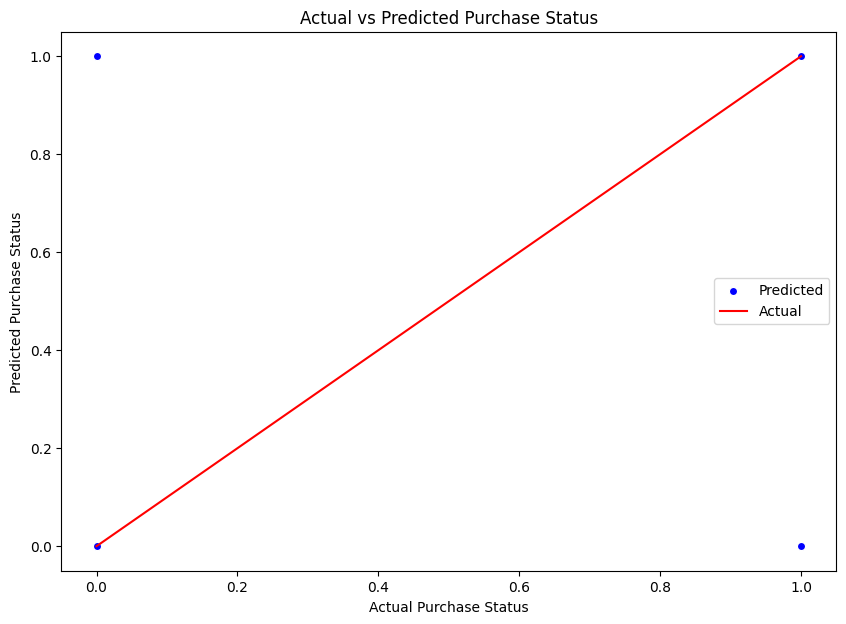

In [77]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, c='blue', marker='o', edgecolor='white', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Actual')
plt.xlabel('Actual Purchase Status')
plt.ylabel('Predicted Purchase Status')
plt.title('Actual vs Predicted Purchase Status')
plt.legend()
plt.show()

## **20. Thank You So Much**